# CS-433 Machine Learning
## Project 1 : The Higgs Boson Challenge

Christian Abbet, Patryk Oleniuk, Gaétan Ramet

We first start by loading our training data and splitting it in a training set (80%) and a validation set (20%)

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import scripts.implementations as lib  # Add personal library
import scripts.ml as ml  # Add personal library
import scripts.proj1_helpers as helper  # Add personal library

%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=4)

DATA_FOLDER = 'data'plt.figure(figsize=(16,24))

for i, feature in enumerate(x_train.T):
    plt.subplot(10, 3, i+1)
    id_keep = ~np.isnan(feature)
    id_b = np.logical_and(y_train == -1, id_keep)
    id_s = np.logical_and(y_train == 1, id_keep)
    plt.boxplot([feature[id_keep], feature[id_b], feature[id_s]], whis=2.5, 
                vert=False, labels=['total', 'back', 'signal'])
    plt.title('Feature {} - {}'.format(i+1, header[i]))

plt.tight_layout()
DATA_TRAIN = os.path.join(DATA_FOLDER, 'train.csv')
DATA_TEST = os.path.join(DATA_FOLDER, 'test.csv')

y, x, ids, header = helper.load_csv_data(DATA_TRAIN)
y_train, x_train,  y_validation, x_validation = lib.sep_valid_train_data(x,y,0.8);

# 1. Data Exploration and Cleaning 


## 1.1 Data Exploration

We first load the data to see what is the repartition of the data. The two possible classes in for the measurements are `s` for signal, indicating the presence of a Higgs boson and `b` for backgroud noise. In this case around 2/3 of the data (65.73%) is labeled as background.

In [2]:
print('Repartition of {} labels, s: {:.2f}%, b: {:.2f}%'.format(
    len(y_train), np.mean(y_train==1)*100, np.mean(y_train==-1)*100))

Repartition of 200000 labels, s: 34.37%, b: 65.63%


According to [the Higgs boson machine learning challenge](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf) some variable are indicated as "may be undefined" when it can happen that they are meaning-
less or cannot be computed. In this case, their value is set to -999.0, which is outside the normal range of all variables. We will set them to NaN so they will be easier to handle.

In [3]:
x_train[x_train == -999] = np.nan
x_validation[x_validation == -999] = np.nan

Let's now take a look at the repartition of the NaN along the features. We can see that some features seems to have the same amount of NaN value. The second graph shows that some features seems to have NaNs values axactly at the same location. We distinguish here 4 different kind of nan distributions: For some feature, we have a high proportions of nans, while for others, it is very low and we don't even see it on the plot. Having so many NaNs in our data lead us to think we can propably use them in some way

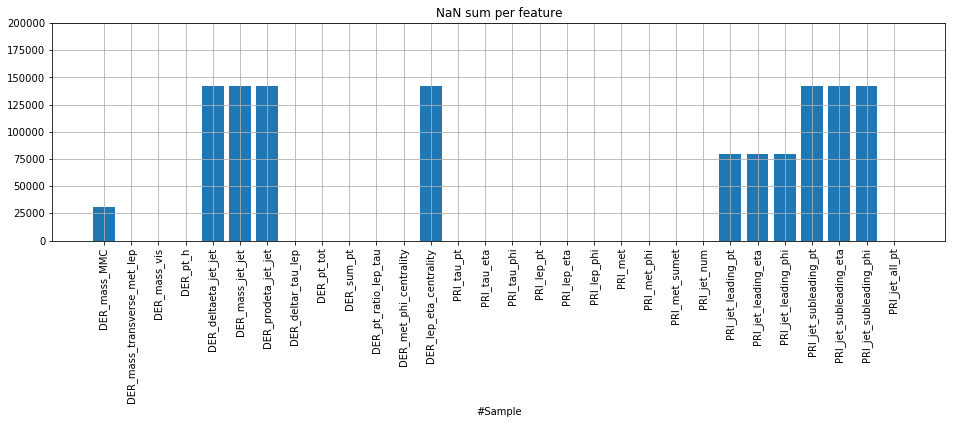

In [4]:
plt.figure(figsize=(16,4))
plt.bar(np.arange(len(header)), np.sum(np.isnan(x_train), axis=0))
plt.xticks(np.arange(len(header)), header, rotation='vertical')
plt.ylim(0, len(y_train)); plt.xlabel('Features'); plt.xlabel('#Sample'); plt.title('NaN sum per feature')
plt.grid(); plt.show();

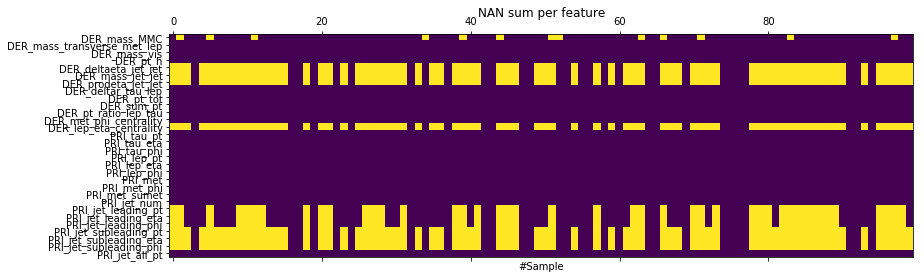

In [5]:
plt.figure(figsize=(14, 20))
plt.matshow(np.isnan(x_train)[:100, :].T)
plt.yticks(np.arange(len(header)), header)
plt.xlabel('Features'); plt.xlabel('#Sample'); plt.title('NAN sum per feature')
plt.show(); 

Does the NaN value gave us any information (`s` or `b`) ? We can see that for some features, the presence of Nan values seems to change the repartition of signal and background measurement : this means that we can use information from the presence of NaNs for classification

In [6]:

for i,feature in enumerate(x_train.T):
    print('Feature {:d} : NaN is present, s: {:.2f}, b: {:.2f}'.format(i,
        np.mean((y_train[(np.isnan(feature))] == 1)),
        np.mean((y_train[(np.isnan(feature))] == -1))))
    print('Feature {:d} : NaN is NOT present, s: {:.2f}, b: {:.2f}'.format(i,
        np.mean((y_train[~(np.isnan(feature))] == 1)),
        np.mean((y_train[~(np.isnan(feature))] == -1))))
    pass
print('NaN is present, s: {:.2f}, b: {:.2f}'.format(
     np.mean(y_train[np.any(np.isnan(x_train), axis=1)] == 1), 
     np.mean(y_train[np.any(np.isnan(x_train), axis=1)] == -1)))
print('NaN is not present, s: {:.2f}, b: {:.2f}'.format(
     np.mean(y_train[~np.any(np.isnan(x_train), axis=1)] == 1), 
     np.mean(y_train[~np.any(np.isnan(x_train), axis=1)] == -1)))

#for i, feature in enumerate(x_train.T):
#    print(' Feature {:d}: NaN is present, s: {:.2f}, b: {:.2f}'.format(i,
#        np.mean(y_train[np.any(np.isnan(feature), axis=0)] == 1), 
#        np.mean(y_train[np.any(np.isnan(feature), axis=0)] == -1)))
#    print(' Feature {:d} : NaN is not present, s: {:.2f}, b: {:.2f}'.format(i,
#        np.mean(y_train[~np.any(np.isnan(feature), axis=0)] == 1), 
#        np.mean(y_train[~np.any(np.isnan(feature), axis=0)] == -1)))

Feature 0 : NaN is present, s: 0.08, b: 0.92
Feature 0 : NaN is NOT present, s: 0.39, b: 0.61
Feature 1 : NaN is present, s: nan, b: nan
Feature 1 : NaN is NOT present, s: 0.34, b: 0.66
Feature 2 : NaN is present, s: nan, b: nan
Feature 2 : NaN is NOT present, s: 0.34, b: 0.66
Feature 3 : NaN is present, s: nan, b: nan
Feature 3 : NaN is NOT present, s: 0.34, b: 0.66
Feature 4 : NaN is present, s: 0.30, b: 0.70
Feature 4 : NaN is NOT present, s: 0.45, b: 0.55
Feature 5 : NaN is present, s: 0.30, b: 0.70


C:\Users\Gaet_2\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Gaet_2\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Feature 5 : NaN is NOT present, s: 0.45, b: 0.55
Feature 6 : NaN is present, s: 0.30, b: 0.70
Feature 6 : NaN is NOT present, s: 0.45, b: 0.55
Feature 7 : NaN is present, s: nan, b: nan
Feature 7 : NaN is NOT present, s: 0.34, b: 0.66
Feature 8 : NaN is present, s: nan, b: nan
Feature 8 : NaN is NOT present, s: 0.34, b: 0.66
Feature 9 : NaN is present, s: nan, b: nan
Feature 9 : NaN is NOT present, s: 0.34, b: 0.66
Feature 10 : NaN is present, s: nan, b: nan
Feature 10 : NaN is NOT present, s: 0.34, b: 0.66
Feature 11 : NaN is present, s: nan, b: nan
Feature 11 : NaN is NOT present, s: 0.34, b: 0.66
Feature 12 : NaN is present, s: 0.30, b: 0.70
Feature 12 : NaN is NOT present, s: 0.45, b: 0.55
Feature 13 : NaN is present, s: nan, b: nan
Feature 13 : NaN is NOT present, s: 0.34, b: 0.66
Feature 14 : NaN is present, s: nan, b: nan
Feature 14 : NaN is NOT present, s: 0.34, b: 0.66
Feature 15 : NaN is present, s: nan, b: nan
Feature 15 : NaN is NOT present, s: 0.34, b: 0.66
Feature 16 : Na

We can also take a look at the feature ranges. it can give us insights of the data. We can see that features (16), (19), (21), (26) and (29) are actually angles (range in $[-\pi, \pi]$). To be certain we checked it directly on the documentation. We decided to also use cosines and sines of these angles as features, as they might be relevant for classification. Note that we are ignoring the NaN values to compute the min and max.

We have to be careful with those results since the output gives us no imformation about the data distribution!

In [7]:
print("Base Features: \n")
for i, feature in enumerate(x_train.T):
    print('Feature {} - {} has range: [{:.4f}, {:.4f}]'.format(
        i+1, header[i], np.nanmin(feature), np.nanmax(feature)))

Base Features: 

Feature 1 - DER_mass_MMC has range: [9.0440, 1192.0260]
Feature 2 - DER_mass_transverse_met_lep has range: [0.0000, 595.8190]
Feature 3 - DER_mass_vis has range: [6.4620, 1329.9130]
Feature 4 - DER_pt_h has range: [0.0000, 1053.8070]
Feature 5 - DER_deltaeta_jet_jet has range: [0.0000, 8.5030]
Feature 6 - DER_mass_jet_jet has range: [13.6020, 4974.9790]
Feature 7 - DER_prodeta_jet_jet has range: [-18.0660, 16.6900]
Feature 8 - DER_deltar_tau_lep has range: [0.2080, 5.6840]
Feature 9 - DER_pt_tot has range: [0.0000, 513.6590]
Feature 10 - DER_sum_pt has range: [46.1040, 1852.4620]
Feature 11 - DER_pt_ratio_lep_tau has range: [0.0470, 19.7730]
Feature 12 - DER_met_phi_centrality has range: [-1.4140, 1.4140]
Feature 13 - DER_lep_eta_centrality has range: [0.0000, 1.0000]
Feature 14 - PRI_tau_pt has range: [20.0000, 622.8620]
Feature 15 - PRI_tau_eta has range: [-2.4990, 2.4970]
Feature 16 - PRI_tau_phi has range: [-3.1420, 3.1420]
Feature 17 - PRI_lep_pt has range: [26.00

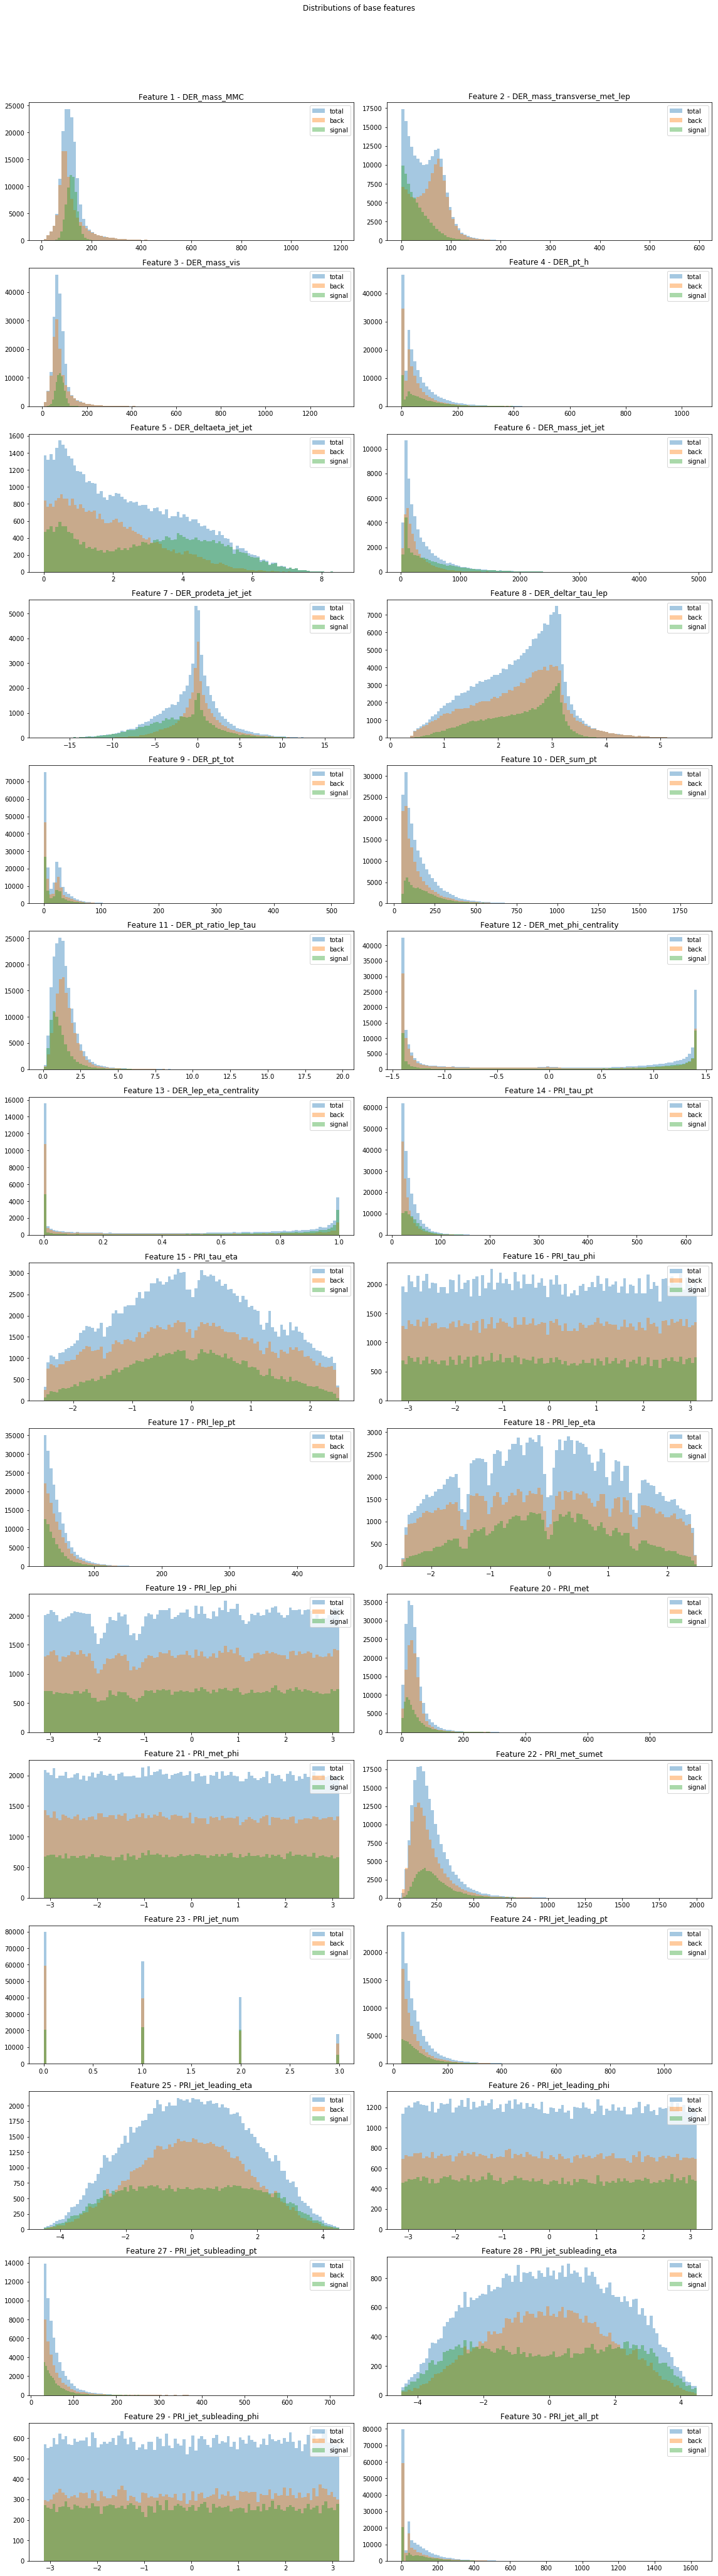

In [16]:
plt.figure(figsize=(16,60))

for i, feature in enumerate(x_train.T):
    plt.subplot(15, 2, i+1)
    id_keep = ~np.isnan(feature)
    id_b = np.logical_and(y_train == -1, id_keep)
    id_s = np.logical_and(y_train == 1, id_keep)
    plt.hist(feature[id_keep], bins=100, alpha=0.4, label='total')
    plt.hist(feature[id_b], alpha=0.4, bins=100, label='back')
    plt.hist(feature[id_s], alpha=0.4, bins=100, label='signal')
    plt.title('Feature {} - {}'.format(i+1, header[i]))
    plt.legend()
plt.suptitle("Distributions of base features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


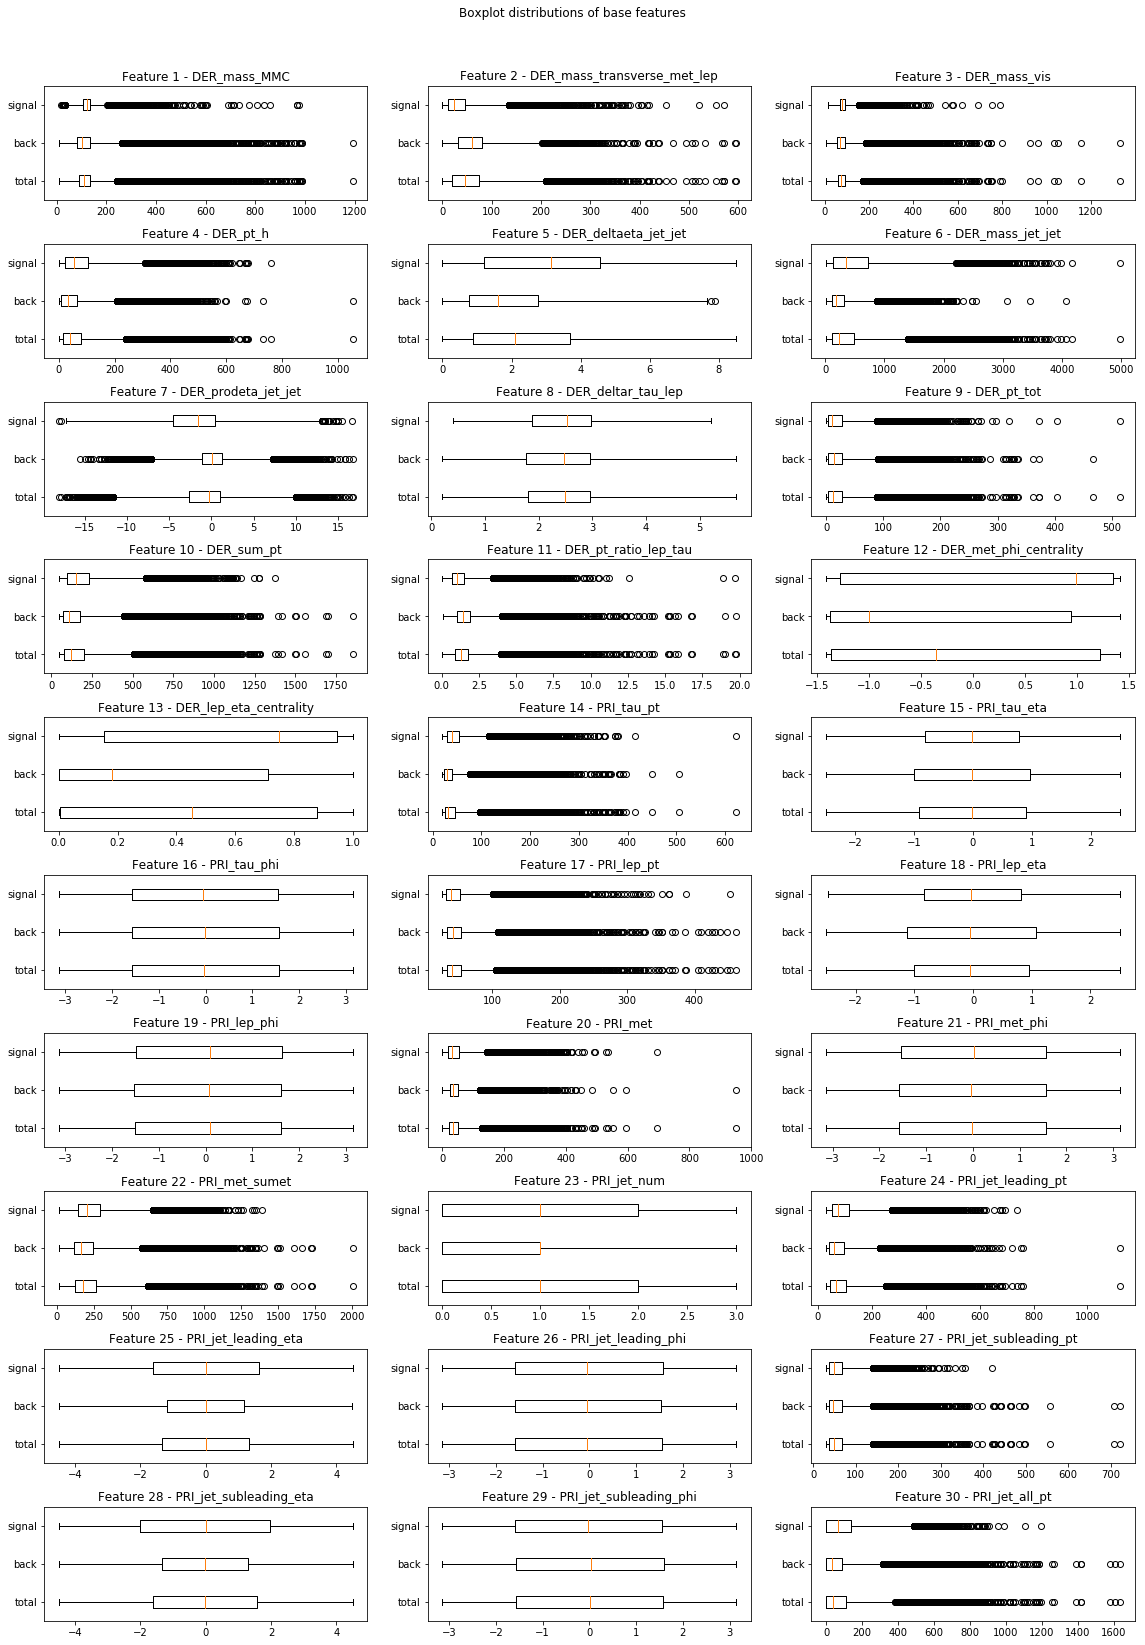

In [17]:
plt.figure(figsize=(16,24))

for i, feature in enumerate(x_train.T):
    plt.subplot(10, 3, i+1)
    id_keep = ~np.isnan(feature)
    id_b = np.logical_and(y_train == -1, id_keep)
    id_s = np.logical_and(y_train == 1, id_keep)
    plt.boxplot([feature[id_keep], feature[id_b], feature[id_s]], whis=2.5, 
                vert=False, labels=['total', 'back', 'signal'])
    plt.title('Feature {} - {}'.format(i+1, header[i]))
plt.suptitle("Boxplot distributions of base features")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


## 1.4 Feature augmentation

We will now use the information gathered in previous section to generate new features that are more helpful for classification. First, we will start working with the angles.

In [ ]:
id_angle = [15, 18, 20, 25, 28]
id_nan = [0, 24, 27]
x_train, header = ml.augmented_feat_angle(x_train, id_angle, header)
#x_train, header = ml.add_nan_feature(x_train, id_nan, header)

for i, feature in enumerate(x_train.T):
    print('Feature {} - {} has range: [{:.4f}, {:.4f}]'.format(
        i+1, header[i], np.nanmin(feature), np.nanmax(feature)))

## 1.4 Data Cleaning - Dealing with physics

In [ ]:
tags, count = np.unique(x_train[:, 22], return_counts=True)
print('Repartition of #jet {} along data {}%'.format(tags, 100*count/len(y_train)))

In [ ]:
plt.figure(figsize=(14, 4))
nan_j = []
for i in range(4):
    nan_j.append(np.array([ np.sum(np.logical_and(x_train[:, 22] == i, np.isnan(f))) for f in x_train.T]))
    plt.bar(np.arange(len(header)), nan_j[-1], 
            label='#Jet={}'.format(i), bottom = np.sum(np.array(nan_j[:-1]), axis=0))
plt.xticks(np.arange(len(header)), header, rotation='vertical'); 
plt.ylim(0, len(y_train));
plt.xlabel('Features'); plt.xlabel('#Sample'); plt.title('NaN sum per feature and Jet number')
plt.legend(); plt.grid(); plt.show()

In [ ]:
def get_data_jet(y, x, id_current_jet, id_jet=22):
    id_select = (x[:, id_jet] == id_current_jet)
    x_jet = x[id_select, :]
    y_jet = y[id_select]
    return id_select, y_jet, x_jet[:, np.logical_and(~np.any(np.isnan(x_jet), axis=0), np.arange(x.shape[1]) != id_jet)]
   
models = []
for i in range(4):
    _, y_train_j, x_train_j = get_data_jet(y_train, x_train, i)
    # Last vector is only 0's for #jet == 0, we remove it
    if i != 0:
        x_train_j = (x_train_j - np.mean(x_train_j, axis=0))/np.std(x_train_j, axis=0)
    else:
        x_train_j = (x_train_j[:, :-1] - np.mean(x_train_j[:, :-1], axis=0))/np.std(x_train_j[:, :-1], axis=0)
    models.append( {'y_train': y_train_j, 'x_train': x_train_j} )
    
len(models)


print()

In [ ]:
for i in range(4):
    r = models[i]['y_train']
    rt = y_train[x_train[: ,22] == i]
    
    xt = x_train[x_train[: ,22] == i]
    xt = xt[:, np.logical_and(~np.any(np.isnan(xt), axis=0), np.arange(xt.shape[1]) != 22)]
    
    if i != 0:
        xt = (xt - np.mean(xt, axis=0))/np.std(xt, axis=0)
    else:
        xt = (xt[:, :-1] - np.mean(xt[:, :-1], axis=0))/np.std(xt[:, :-1], axis=0)
    
    print(np.linalg.norm(xt-models[i]['x_train']))
    print(np.sum(r - rt))

In [ ]:
degrees = np.linspace(1, 12, 12).astype(int)
best_acc = np.zeros(len(models))
for j, model in enumerate(models):
    acc = np.zeros(len(degrees))
    tr = np.zeros(len(degrees))
    te = np.zeros(len(degrees))
    for i, degree in enumerate(degrees):
        acc[i], tr[i], te[i] = cross_validation_ls(model['y_train'], model['x_train'], degree=degree)
        print('Jet-{}-{}: Least square max acc: {:.4f}, {:.4f}, {:.4f}'.format(
            j, degree, acc[i], tr[i], te[i]))
    best_acc[j] = np.max(acc)
    #print('Jet-{}: Least square max acc: {:.4f}, {:.4f}, {:.4f}, for deg: {}'.format(
    #    j, np.max(acc), tr[np.argmax(acc)], te[np.argmax(acc)], degrees[np.argmax(acc)]))
# Sum accuracy with the actual repartition of #jet over dataset
print('\n-> Theorical overal accuracy: {:.4f}'.format(np.sum(best_acc * count/len(y_train))))

# 2. Submission test

In [ ]:
# Load both train and test data
y_train, x_train, ids_train, header = helper.load_csv_data(DATA_TRAIN)
y_test, x_test, ids_test, header = helper.load_csv_data(DATA_TEST)
x_train[x_train == -999] = np.nan
x_test[x_test == -999] = np.nan

In [ ]:
tags, count = np.unique(x_train[:, 22], return_counts=True)
print('Repartition of #jet {} along train data {}%'.format(tags, 100*count/len(y_train)))
tags, count = np.unique(x_test[:, 22], return_counts=True)
print('Repartition of #jet {} along test data {}%'.format(tags, 100*count/len(y_test)))

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(14, 8))
nan_j_tr = []; nan_j_te = []
for i in range(4):
    nan_j_tr.append(np.array([ np.sum(np.logical_and(x_train[:, 22] == i, np.isnan(f))) for f in x_train.T])/len(y_train))
    nan_j_te.append(np.array([ np.sum(np.logical_and(x_test[:, 22] == i, np.isnan(f))) for f in x_test.T])/len(y_test))
    axes[0].bar(np.arange(len(header)), nan_j_tr[-1], 
            label='Ratio Jet={}'.format(i), bottom = np.sum(np.array(nan_j_tr[:-1]), axis=0))
    axes[1].bar(np.arange(len(header)), nan_j_te[-1], 
            label='Ratio Jet={}'.format(i), bottom = np.sum(np.array(nan_j_te[:-1]), axis=0))
    
plt.xticks(np.arange(len(header)), header, rotation='vertical'); 
axes[0].set_ylim(0, 1); axes[0].set_ylabel('Ratio Jet'); axes[1].set_ylabel('Ratio Jet'); 
axes[0].grid(); axes[1].grid()
plt.xlabel('Features'); plt.xlabel('#Sample'); 
axes[0].set_title('NaN sum per feature and Jet number - Train')
axes[1].set_title('NaN sum per feature and Jet number - Test')
plt.legend(); plt.show()

In [ ]:
models = []
for i in range(4):
    _, y_train_j, x_train_j = get_data_jet(y_train, x_train, i)
    id_test_j, _,  x_test_j = get_data_jet(y_test, x_test, i)
    # Last vector is only 0's for #jet == 0, we remove it
    if i != 0:
        x_train_j = (x_train_j - np.mean(x_train_j, axis=0))/np.std(x_train_j, axis=0)
        x_test_j = (x_test_j - np.mean(x_test_j, axis=0))/np.std(x_test_j, axis=0)
        #pass
    else:
        x_train_j = (x_train_j[:, :-1] - np.mean(x_train_j[:, :-1], axis=0))/np.std(x_train_j[:, :-1], axis=0)
        x_test_j = (x_test_j[:, :-1] - np.mean(x_test_j[:, :-1], axis=0))/np.std(x_test_j[:, :-1], axis=0)
    print(np.shape(y_train_j), np.shape(x_train_j), np.shape(y_test_j), np.shape(x_test_j))
    models.append( {'y_train': y_train_j, 'x_train': x_train_j, 
                    'x_test': x_test_j, 'id_test': id_test_j} )
    
sum_ = 0
for model in models:
    sum_ += np.sum(model['id_test'])
    
print(sum_, len(y_test))

In [ ]:
from scripts.implementations import build_poly, least_squares, accuracy
from scripts.proj1_helpers import predict_labels

y_pred = np.zeros(len(y_test))
best_degrees = [1, 4, 5, 6]
for i, model in enumerate(models):
    
    _phi_train = build_poly(model['x_train'], best_degrees[i])
    _phi_test = build_poly(model['x_test'], best_degrees[i])
    loss, weights = least_squares(model['y_train'], _phi_train)
    
    y_pred_tmp = predict_labels(weights, _phi_test)
    y_pred[model['id_test']] = y_pred_tmp
    print(np.sum(y_pred == 0))
    print(accuracy(model['y_train'], _phi_train.dot(weights)))
    
print(np.sum(y_pred == 0))

In [ ]:
from scripts.proj1_helpers import create_csv_submission

create_csv_submission(ids_test, y_pred, 'f.csv')
print('Results saved ...')

In [ ]:
y_pred_old

In [ ]:
np.unique(x_test[y_pred==y_pred_old, 22], return_counts=True)

In [ ]:
0.4*0.81 + 0.6*0.65773

In [ ]:
sum_ = 0
for i in range(4):
    id_test_j, y_test_j, x_test_j = get_data_jet(y_test, x_test, i)
    # Last vector is only 0's for #jet == 0, we remove it
    if i != 0:
        x_test_j = (x_test_j - np.mean(x_test_j, axis=0))/np.std(x_test_j, axis=0)
    else:
        x_test_j = (x_test_j[:, :-1] - np.mean(x_test_j[:, :-1], axis=0))/np.std(x_test_j[:, :-1], axis=0)
    sum_ += np.sum(id_test_j)
    models[i]['id_test'] = id_test_j 
    models[i]['x_test'] = x_test_j
    
print(sum_, len(y_test))
print(np.nonzero(models[3]['id_test']))
print(np.nonzero(x_test[:, 22]==3))

In [ ]:
from scripts.implementations import build_poly, least_squares, accuracy
from scripts.proj1_helpers import predict_labels

y_pred = np.zeros(len(y_test))
best_degrees = [1, 4, 3, 4]

for i, model in enumerate(models):
    # Build polynomial matrix
    _phi_train = build_poly(model['x_train'], best_degrees[i])
    _phi_test = build_poly(model['x_test'], best_degrees[i])
    print(np.shape(model['x_train']), np.shape(model['x_test']))
    loss, weights = least_squares(model['y_train'], _phi_train)
    y_pred_tmp = predict_labels(weights, _phi_test)
    y_pred[model['id_test']] = y_pred_tmp
    print(accuracy(model['y_train'], _phi_train.dot(weights)))

In [ ]:
from scripts.proj1_helpers import create_csv_submission

create_csv_submission(ids, y_pred, 'submission.csv')
print('Results saved ...')

# 3. Model 
..... meeeeehhh

In [ ]:
from scripts.implementations import build_poly, least_squares, least_squares_GD, accuracy

xt =  build_poly(x, 3)
loss, w = least_squares(yb, xt)
print(loss, np.shape(w))
#loss, w = least_squares_GD(yb, xt, max_iters=700, loss_name='mae')
#print(loss)

print(np.shape(x))

In [ ]:
accuracy(yb, xt.dot(w))

In [ ]:
from scripts.ml import cross_validation_ls

_acc = []
_loss_tr = []
_loss_te = []

for degree in range(1,6):
    print('Least square, deg: {}'.format(degree))
    acc, loss_tr, loss_te = cross_validation_ls(yb, x, degree=degree)
    _acc.append(acc); _loss_te.append(loss_te), _loss_tr.append(loss_tr)

In [ ]:
plt.plot(_acc)

In [ ]:
from scripts.ml import cross_validation_ridge

_acc = []
_loss_tr = []
_loss_te = []

for degree in range(1,6):
    print('Ridge, deg: {}'.format(degree))
    acc, loss_tr, loss_te = cross_validation_ridge(yb, x, degree=degree)
    _acc.append(acc); _loss_te.append(loss_te), _loss_tr.append(loss_tr)

In [ ]:
plt.plot(_acc)